## Library yang akan digunakan

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Memanggil dataset

In [76]:
df = pd.read_csv('dairy_queen.csv')

## 1. BUSINESS UNDERSTANDING

1. Pengertian

Pada tahap ini membutuhkan pengetahuan dari objek bisnis, bagaimana membangun atau mendapatkan data, dan bagaimana untuk mencocokan tujuan pemodelan untuk tujuan bisnis sehingga model terbaik dapat dibangun. Kegiatan yang dilakukan antara lain: menentukan tujuan dan persyaratan dengan jelas secara keseluruhan, menerjemahkan tujuan tersebut serta menentukan pembatasan dalam perumusan masalah data mining, dan selanjutnya mempersiapkan strategi awal untuk mencapai tujuan tersebut.

2. Problem 

Dairy Queen di American memiliki berbagai macam menu dengan jumlah kandungan gizi yang tentunya berbeda-beda. Maka dari itu, Dairy Queen mencantumkan kompoisi di setiap menu makanan yang dibantu oleh pakar kesehatan  dan ahli diet, apakah mengkonsumsi makanan dengan melihat dan menghitung asupan kalori dengan tidak berlebihan nar dan sesuai yang dibutuhkan oleh tubuh dapat mempengaruhi kadar kolesterol, protein, karbohidrat, total lemak dan gula tanpa khawatir pelanggan terkena penyakit kronis.

3. Tujuan

Dataset yang di ambil dari kaggle ini (https://www.kaggle.com/datasets/mattop/dairy-queen-menu-nutrition-data) bertujuan untuk menganalisis dan mengetahui estimasi jumlah kalori dari menu makanan Dairy Queen, agar pelanggan dapat lebih memahami kandungan gizi  dan sadar akan apa yang mereka makan agar dapat mengelola kesehatan tubuh dengan lebih baik.

## 2. DATA UNDERSTANDING

1. Pengertian 

Tahap ini memberikan fondasi analitik untuk sebuah penelitian dengan membuat ringkasaan (summary) dan mengidentifikasi potensi masalah dalam data. Tahap ini juga harus dilakukan secara cermat dan tidak terburu-buru, seperti pada visualisasi data, yang terkadang insight-nya sangat sulit didapat dika dihubungkan dengan summary data nya. Jika ada masalah pada tahap ini yang belum terjawab, maka akan menggangu pada tahap modeling.

Dari pengumpulan data yang telah diambil mengenai Menu nutrisi McDonalds India, terdapat 9 kolom yang berisi 1 kolom objek, 2 kolom float dan 6 kolom int. Jika menggunakan regresi linear, maka hanya kolom yang berisi float saja yang bisa diolah. Berikut atribut-atribut nya :

0. Menu = objek
1. Calories (Kalori) = int
2. Fat_Calories (Lemak Kalori) = int
3. Total_fat (Total Lemak) = float
4. Cholesterol (Kolestrol) = int
5. Sodium (Sodium) = int 
6. Carbohydrate (karbohidrat) = int         
7. Sugars (Gula) = int 
8. Protein (Protein) = float

## Deskripsi dataset

In [77]:
df.head(7)

,Menu,Calories,Fat_Calories,Total_Fat,Cholesterol,Sodium,Carbohydrates,Sugars,Protein
0,Caramel Mocha Chip Shake - Small,600,100,27.0,45,240,79,65,12.0
1,Caramel Mocha Chip Shake - Medium,830,170,39.0,55,310,106,86,16.0
2,Caramel Mocha Chip Shake - Large,1100,230,52.0,75,410,140,113,20.0
3,Cinnamon Roll Centers Blizzard - Mini,360,300,13.0,45,150,53,43,8.0
4,Cinnamon Roll Centers Blizzard - Small,620,240,22.0,85,270,93,75,13.0
5,Cinnamon Roll Centers Blizzard - Medium,890,350,32.0,120,390,132,106,18.0
6,Cinnamon Roll Centers Blizzard - Large,1170,470,43.0,160,520,175,139,22.0


# DATA PREPARATION

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Menu           229 non-null    object 
 1   Calories       229 non-null    int64  
 2   Fat_Calories   229 non-null    int64  
 3   Total_Fat      229 non-null    float64
 4   Cholesterol    229 non-null    int64  
 5   Sodium         229 non-null    int64  
 6   Carbohydrates  229 non-null    int64  
 7   Sugars         229 non-null    int64  
 8   Protein        229 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 16.2+ KB


## Mencari heatmap

<AxesSubplot:>

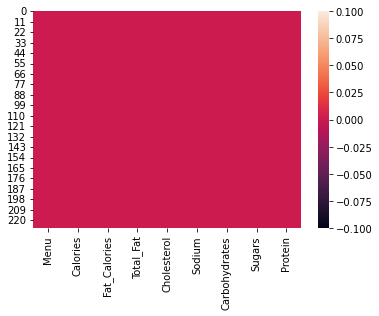

In [80]:
sns.heatmap(df.isnull())

## Melihat Nilai Data

In [81]:
df.describe()

,Calories,Fat_Calories,Total_Fat,Cholesterol,Sodium,Carbohydrates,Sugars,Protein
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,567.292576,207.694323,23.093013,46.004367,469.759825,77.489083,58.270742,13.479476
std,313.542447,151.594545,16.852665,36.692714,514.575544,45.169623,42.420783,9.637712
min,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,330.000000,100.000000,12.000000,25.000000,180.000000,40.000000,14.000000,8.000000
50%,500.000000,180.000000,20.000000,45.000000,290.000000,73.000000,58.000000,12.000000
75%,760.000000,290.000000,32.000000,65.000000,520.000000,106.000000,87.000000,18.000000
max,1510.000000,650.000000,72.000000,180.000000,2710.000000,203.000000,158.000000,49.000000


## Visualisasi Data

<AxesSubplot:>

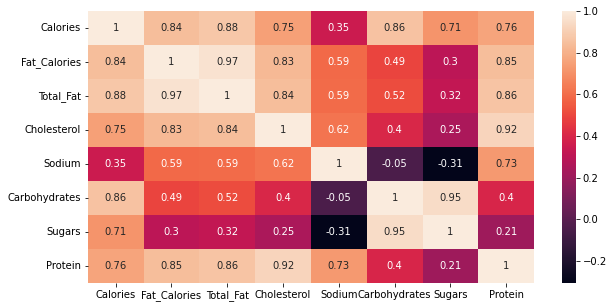

In [82]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

## Jumlah Kalori Berdasarkan Tipe Makanan

In [88]:
brands = df.groupby('Menu').count()[['Total_Fat']].sort_values(by='Total_Fat', ascending=True).reset_index()
brands = brands.rename(columns={'Total_Fat':'Calories'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

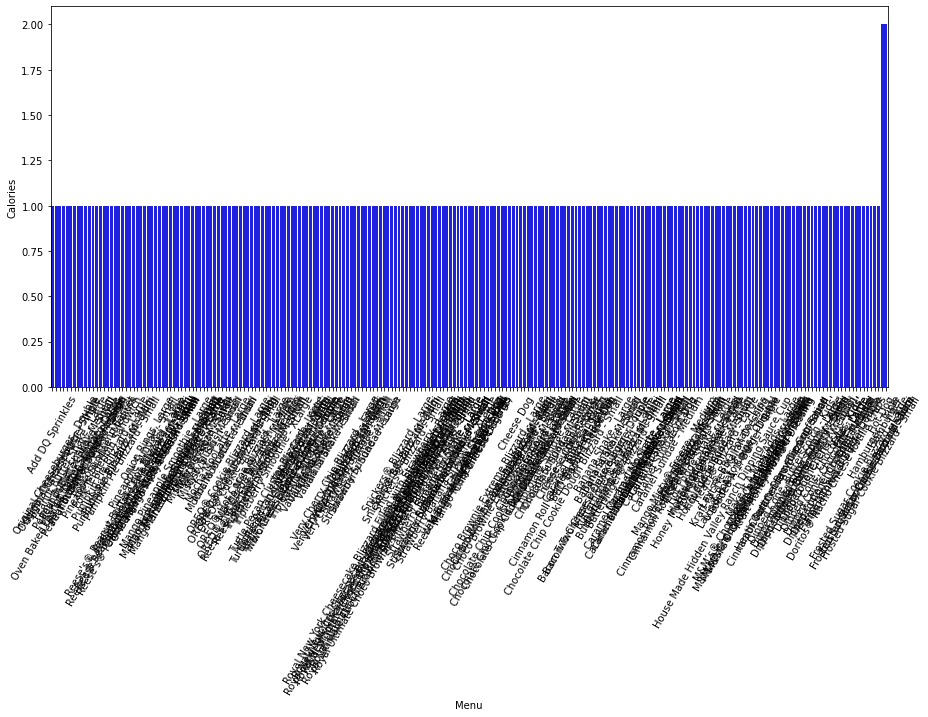

In [89]:
fig = plt.figure(figsize = (15,7))
sns.barplot(x = brands['Menu'], y = brands['Calories'], color = 'blue')
plt.xticks(rotation = 60)

# MODELLING DATA

## Seleksi Fitur

In [90]:
fitur = ['Cholesterol', 'Carbohydrates','Sugars', 'Protein', 'Total_Fat']
x = df[fitur]
y = df['Calories']
x.shape, y.shape

((229, 5), (229,))

## Split Data Training & Testing

In [91]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 70)
y_test.shape

(58,)

## membuat regresi linier

In [92]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
predik = lr.predict(X_test)

# EVALUTION DATA

In [93]:
y = lr.score(X_test, y_test)
print('Akurasi Model Regresi Linier : ', y)

Akurasi Model Regresi Linier :  0.9995907837922658


## Membuat inputan regresi linier

In [94]:
#Cholesterols(mg) = 125 , Carbohydrate(g) = 37 , Sugars(g) = 7 , Protein(g) = 34, Total_Fat(g) = 49
inputan = np.array([[125, 37, 7, 34, 49]])
prediksi = lr.predict(inputan)
print('Estimasi Jumlah Energi dalam setiap size menu  : ', prediksi)

Estimasi Jumlah Energi dalam setiap size menu  :  [723.25055104]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# DEPLOYMENT

## Save Model

In [95]:
import pickle
filename = 'estimasi_dairyqueen.sav'
pickle.dump(lr,open(filename,'wb'))